In [355]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__version__ = '1.0.0'
__author__ = 'Abien Fred Agarap'

import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from time import time
from warnings import simplefilter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [356]:
data = pd.read_excel('/Users/shubhamsingh/Desktop/Book1.xlsx') 
data.shape

(6453, 13)

In [357]:
data = data.sample(frac=1).reset_index(drop=True)

In [358]:
data

,choice,ID,DIST1,CROWD1,QT1,DIST2,CROWD2,QT2,DIST3,CROWD3,QT3,Ages,occupation
0,1,612,1,1,1,2,2,2,3,3,3,1,1
1,3,245,2,2,1,3,3,2,1,1,3,1,1
2,2,98,2,1,3,3,2,1,1,3,2,1,3
3,1,323,1,2,2,2,3,3,3,1,1,1,2
4,3,353,2,2,1,3,3,2,1,1,3,4,2
5,2,279,2,1,3,3,2,1,1,3,2,1,1
6,1,124,3,2,3,1,3,1,2,1,2,2,3
7,1,499,1,1,1,2,2,2,3,3,3,1,1
8,2,631,3,3,1,1,1,2,2,2,3,1,1
9,1,308,2,2,1,3,3,2,1,1,3,1,1


In [359]:
data.shape
data_np = np.uint8(data)

In [360]:
data.head()

,choice,ID,DIST1,CROWD1,QT1,DIST2,CROWD2,QT2,DIST3,CROWD3,QT3,Ages,occupation
0,1,612,1,1,1,2,2,2,3,3,3,1,1
1,3,245,2,2,1,3,3,2,1,1,3,1,1
2,2,98,2,1,3,3,2,1,1,3,2,1,3
3,1,323,1,2,2,2,3,3,3,1,1,1,2
4,3,353,2,2,1,3,3,2,1,1,3,4,2


In [361]:
X = data_np[:,2:]
y = data_np[:,0]

In [362]:
X.shape

(6453, 11)

In [363]:
y.shape

(6453,)

In [364]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [365]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

#Create a Gaussian Classifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features=None,
                              random_state=None, max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None, 
                              class_weight=None, presort=False)
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')



#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [366]:
y_pred  = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [367]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy K Neighbors:",metrics.accuracy_score(y_test, y_pred2))

Accuracy of Random Forest: 0.570875290472502
Accuracy Decision Tree: 0.5739736638264911
Accuracy K Neighbors: 0.5445391169635941


In [368]:
print("Report Random Forest")
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

Report Random Forest
             precision    recall  f1-score   support

          1       0.57      0.70      0.63       511
          2       0.59      0.54      0.57       413
          3       0.54      0.43      0.48       367

avg / total       0.57      0.57      0.57      1291



In [369]:
print("Report Decision Tree")
print(classification_report(y_test, y_pred1, labels=[1, 2, 3]))

Report Decision Tree
             precision    recall  f1-score   support

          1       0.57      0.70      0.63       511
          2       0.59      0.56      0.58       413
          3       0.55      0.41      0.47       367

avg / total       0.57      0.57      0.57      1291



In [370]:
print("Report K Neighbors")
print(classification_report(y_test, y_pred2, labels=[1, 2, 3]))

Report K Neighbors
             precision    recall  f1-score   support

          1       0.59      0.60      0.59       511
          2       0.56      0.56      0.56       413
          3       0.47      0.45      0.46       367

avg / total       0.54      0.54      0.54      1291



In [371]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

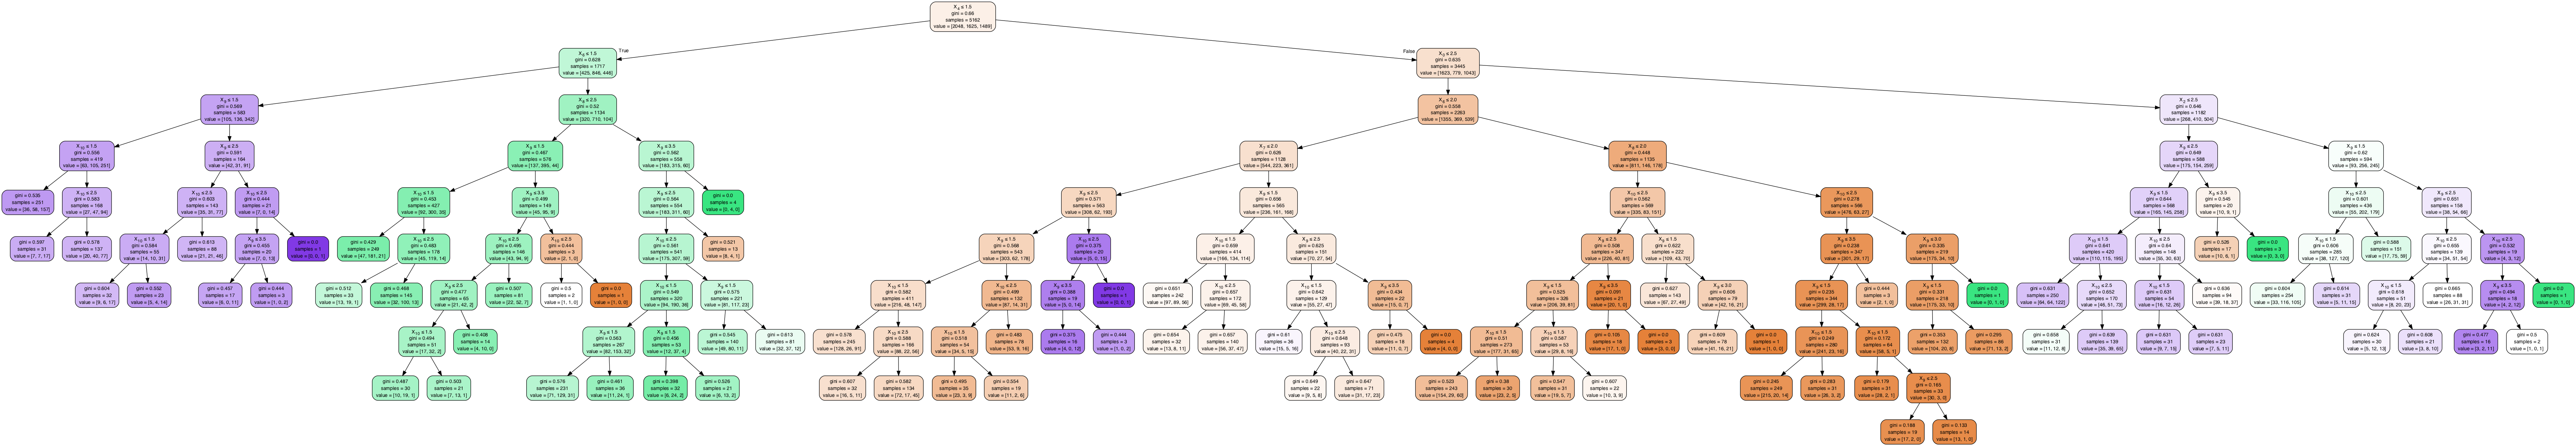

In [372]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [397]:
from sklearn.cluster import KMeans

In [410]:
#x = np.concatenate((X_train, X_test))
#y = np.concatenate((y_train, y_test))

# 3 clusters
n_clusters = len(np.unique(y))
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20).fit(X_train,y_train)
# Train K-Means.
y_pred_kmeans = kmeans.predict(X_test)
# Evaluate the K-Means clustering accuracy.
#metrics.acc(y, y_pred_kmeans)
print("Accuracy K Means:",metrics.accuracy_score(y_test, y_pred_kmeans))

Accuracy K Means: 0.32765298218435324


In [411]:
print("Report K Means")
print(classification_report(y_test, y_pred_kmeans, labels=[1, 2, 3]))

Report K Means
             precision    recall  f1-score   support

          1       0.52      0.53      0.52       511
          2       0.58      0.37      0.45       413
          3       0.00      0.00      0.00       367

avg / total       0.39      0.33      0.35      1291



/Users/shubhamsingh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
